In [4]:
import requests
from bs4 import BeautifulSoup

# URLs des Wahlprogramms der Grünen (auf mehrere Seiten verteilt)
urls = [
    "https://www.gruene.de/themen/klimagerechte-und-soziale-verkehrspolitik",
    "https://www.gruene.de/themen/die-wirtschaft-stärken",
    "https://www.gruene.de/themen/klima-schützen",
    "https://www.gruene.de/themen/umwelt-und-natur-schützen",
    "https://www.gruene.de/themen/energiewende-vorantreiben",
    "https://www.gruene.de/themen/digitalisierung-vorantreiben",
    "https://www.gruene.de/themen/ländliche-räume-stärken",
    "https://www.gruene.de/themen/faire-landwirtschaft",
    "https://www.gruene.de/themen/gesundheit-und-pflege-stärken",
    "https://www.gruene.de/themen/eine-gerechte-gesellschaft",
    "https://www.gruene.de/themen/einwanderung-gestalten",
    "https://www.gruene.de/themen/eine-vielfältige-gesellschaft-gestalten",
    "https://www.gruene.de/themen/gleichberechtigung-verwirklichen",
    "https://www.gruene.de/themen/wertegeleitete-außenpolitik",
    "https://www.gruene.de/themen/demokratie-schuetzen-innere-sicherheit-staerken",
    "https://www.gruene.de/themen/kultur-foerdern"
]

# Variable zum Speichern des gesamten Textes
gruene_gesamt = ""

# Durch die URLs iterieren und den Text extrahieren
for url in urls:
    try:
        # HTTP-Request an die Webseite senden
        response = requests.get(url, timeout=10)

        # Überprüfen, ob der Request erfolgreich war
        if response.status_code == 200:
            soup = BeautifulSoup(response.content, "html.parser")

            # Liste für strukturierten Text
            structured_text = ""

            # Alle relevanten Abschnitte mit Headings + zugehörigem Text finden
            content_sections = soup.find_all("div", class_="rich-text text-lg rich-text max-w-lg")

            for section in content_sections:
                # Überschrift aus dem nächsten vorherigen <span> mit passender Klasse holen
                heading = section.find_previous("span", class_="text-xl md:text-2xl group-open:mark-style group-hover:mark-style mark-style-no-hover hover:mark-style")
                
                # Falls eine Überschrift gefunden wurde, speichern
                if heading:
                    heading_text = heading.get_text(strip=True)
                    structured_text += f"{heading_text}\n"

                # Alle Absätze aus dem aktuellen Abschnitt hinzufügen
                paragraph_texts = "\n".join([p.get_text(strip=True) for p in section.find_all("p")])
                structured_text += f"{paragraph_texts}\n\n"

            # Wahlprogramm extrahieren
            paragraphs = soup.find_all(["h1", "h2", "h3", "p"])
            wahlprogramm_text = "\n".join([para.get_text(strip=True) for para in paragraphs])

            # "Mehr erfahren ↓" entfernen
            wahlprogramm_text = wahlprogramm_text.replace("Mehr erfahren ↓", "")

            # Den strukturierten Text und den normalen Wahlprogramm-Text hinzufügen
            gruene_gesamt += structured_text + wahlprogramm_text + "\n\n"

            print(f"Erfolgreich verarbeitet: {url}")
        else:
            print(f"Fehler beim Abrufen der Seite {url}: HTTP {response.status_code}")

    except requests.RequestException as e:
        print(f"Fehler beim Abrufen von {url}: {e}")

# Gesamtwortanzahl berechnen
word_count = len(gruene_gesamt.split())
print(f"\nGesamtanzahl der Wörter: {word_count}")

# Wahlprogramm-Text speichern
with open("gruene.txt", "w", encoding="utf-8") as file:
    file.write(gruene_gesamt)

print("\nDatei erfolgreich gespeichert als 'gruene.txt'")


Erfolgreich verarbeitet: https://www.gruene.de/themen/klimagerechte-und-soziale-verkehrspolitik
Erfolgreich verarbeitet: https://www.gruene.de/themen/die-wirtschaft-stärken
Erfolgreich verarbeitet: https://www.gruene.de/themen/klima-schützen
Erfolgreich verarbeitet: https://www.gruene.de/themen/umwelt-und-natur-schützen
Erfolgreich verarbeitet: https://www.gruene.de/themen/energiewende-vorantreiben
Erfolgreich verarbeitet: https://www.gruene.de/themen/digitalisierung-vorantreiben
Erfolgreich verarbeitet: https://www.gruene.de/themen/ländliche-räume-stärken
Erfolgreich verarbeitet: https://www.gruene.de/themen/faire-landwirtschaft
Erfolgreich verarbeitet: https://www.gruene.de/themen/gesundheit-und-pflege-stärken
Erfolgreich verarbeitet: https://www.gruene.de/themen/eine-gerechte-gesellschaft
Erfolgreich verarbeitet: https://www.gruene.de/themen/einwanderung-gestalten
Erfolgreich verarbeitet: https://www.gruene.de/themen/eine-vielfältige-gesellschaft-gestalten
Erfolgreich verarbeitet: h

In [9]:
import requests
from bs4 import BeautifulSoup

# URLs des Wahlprogramms der Grünen
urls = [
    "https://www.gruene.de/themen/klimagerechte-und-soziale-verkehrspolitik",
    "https://www.gruene.de/themen/die-wirtschaft-stärken",
    "https://www.gruene.de/themen/klima-schützen",
    "https://www.gruene.de/themen/umwelt-und-natur-schützen",
    "https://www.gruene.de/themen/energiewende-vorantreiben",
    "https://www.gruene.de/themen/digitalisierung-vorantreiben",
    "https://www.gruene.de/themen/ländliche-räume-stärken",
    "https://www.gruene.de/themen/faire-landwirtschaft",
    "https://www.gruene.de/themen/gesundheit-und-pflege-stärken",
    "https://www.gruene.de/themen/eine-gerechte-gesellschaft",
    "https://www.gruene.de/themen/einwanderung-gestalten",
    "https://www.gruene.de/themen/eine-vielfältige-gesellschaft-gestalten",
    "https://www.gruene.de/themen/gleichberechtigung-verwirklichen",
    "https://www.gruene.de/themen/wertegeleitete-außenpolitik",
    "https://www.gruene.de/themen/demokratie-schuetzen-innere-sicherheit-staerken",
    "https://www.gruene.de/themen/kultur-foerdern"
]

# Variable zum Speichern des gesamten Textes
gruene_gesamt = ""

# Durch die URLs iterieren und den Text extrahieren
for url in urls:
    try:
        # HTTP-Request an die Webseite senden
        response = requests.get(url, timeout=10)

        # Überprüfen, ob der Request erfolgreich war
        if response.status_code == 200:
            soup = BeautifulSoup(response.content, "html.parser")

            # Liste für strukturierten Text
            structured_text = ""

            # Wahlprogramm-Text extrahieren
            elements = soup.find_all(["h1", "h2", "h3", "p"])

            for elem in elements:
                text = elem.get_text(strip=True)
                if not text:
                    continue  # Leere Absätze überspringen

                # Formatierung nach Element-Typ
                if elem.name in ["h1", "h2"]:
                    structured_text += f"## {text}\n\n"  # These
                elif elem.name == "h3":
                    structured_text += f"### {text}\n\n"  # Überschrift
                else:
                    structured_text += f"# {text}\n\n"  # Normaler Text

            # "Mehr erfahren ↓" entfernen
            structured_text = structured_text.replace("Mehr erfahren ↓", "")

            # Den strukturierten Text hinzufügen
            gruene_gesamt += structured_text + "\n\n"

            print(f"Erfolgreich verarbeitet: {url}")
        else:
            print(f"Fehler beim Abrufen der Seite {url}: HTTP {response.status_code}")

    except requests.RequestException as e:
        print(f"Fehler beim Abrufen von {url}: {e}")

# Gesamtwortanzahl berechnen
word_count = len(gruene_gesamt.split())
print(f"\nGesamtanzahl der Wörter: {word_count}")

# Wahlprogramm-Text speichern
with open("gruene.txt", "w", encoding="utf-8") as file:
    file.write(gruene_gesamt)

print("\nDatei erfolgreich gespeichert als 'gruene.txt'")


Erfolgreich verarbeitet: https://www.gruene.de/themen/klimagerechte-und-soziale-verkehrspolitik
Erfolgreich verarbeitet: https://www.gruene.de/themen/die-wirtschaft-stärken
Erfolgreich verarbeitet: https://www.gruene.de/themen/klima-schützen
Erfolgreich verarbeitet: https://www.gruene.de/themen/umwelt-und-natur-schützen
Erfolgreich verarbeitet: https://www.gruene.de/themen/energiewende-vorantreiben
Erfolgreich verarbeitet: https://www.gruene.de/themen/digitalisierung-vorantreiben
Erfolgreich verarbeitet: https://www.gruene.de/themen/ländliche-räume-stärken
Erfolgreich verarbeitet: https://www.gruene.de/themen/faire-landwirtschaft
Erfolgreich verarbeitet: https://www.gruene.de/themen/gesundheit-und-pflege-stärken
Erfolgreich verarbeitet: https://www.gruene.de/themen/eine-gerechte-gesellschaft
Erfolgreich verarbeitet: https://www.gruene.de/themen/einwanderung-gestalten
Erfolgreich verarbeitet: https://www.gruene.de/themen/eine-vielfältige-gesellschaft-gestalten
Erfolgreich verarbeitet: h

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 0.0/14.6 MB ? eta -:--:--
     - -------------------------------------- 0.5/14.6 MB 3.4 MB/s eta 0:00:05
     ---- ----------------------------------- 1.6/14.6 MB 5.2 MB/s eta 0:00:03
     ----- ---------------------------------- 2.1/14.6 MB 4.4 MB/s eta 0:00:03
     --------- ------------------------------ 3.4/14.6 MB 4.4 MB/s eta 0:00:03
     ------------ --------------------------- 4.5/14.6 MB 4.5 MB/s eta 0:00:03
     --------------- ------------------------ 5.8/14.6 MB 4.8 MB/s eta 0:00:02
     ----------------- ---------------------- 6.6/14.6 MB 4.6 MB/s eta 0:00:02
     -------------------- ------------------- 7.6/14.6 MB 4.7 MB/s eta 0:00:02
     ------------------------ --------------- 8.9/14.6 MB 4.8 MB/s eta 0:00:02
     --------------------------- ------------ 10.0/14.6 MB 4.9 MB/s eta 0:00:01
     ------------------------------ --------- 11.0/14.6 MB 


[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: C:\Users\corin\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


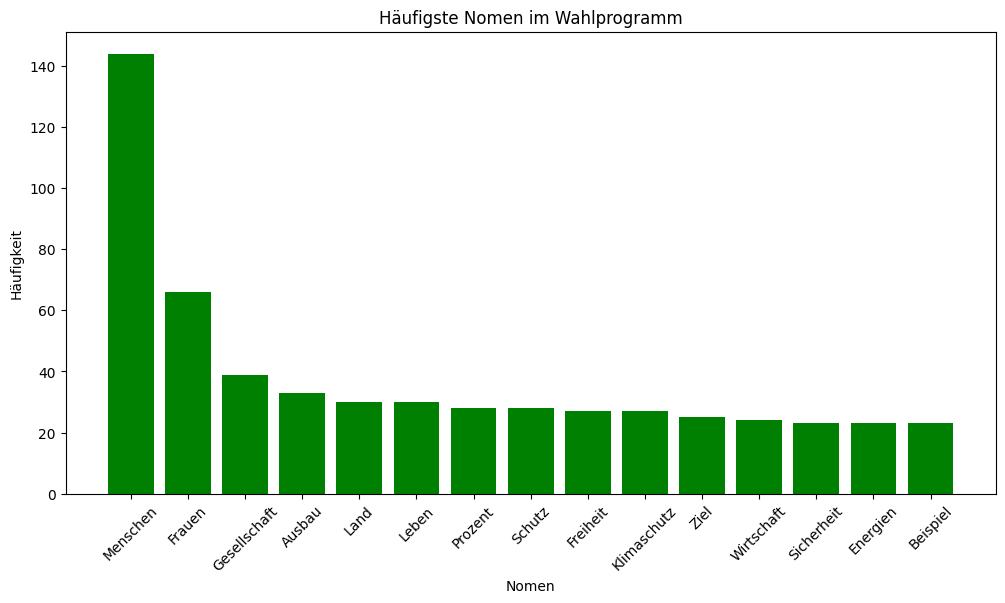

In [6]:
!python -m spacy download de_core_news_sm
import spacy
from collections import Counter
import re
import matplotlib.pyplot as plt

# Deutsche Sprachmodell von spaCy laden
nlp = spacy.load("de_core_news_sm")

# Datei einlesen
with open("gruene.txt", "r", encoding="utf-8") as file:
    text = file.read()

# Nur Wörter extrahieren (keine Zahlen oder Sonderzeichen)
words = re.findall(r'\b\w+\b', text)

# Wörter mit spaCy als Nomen identifizieren
nouns = [token.text for token in nlp(" ".join(words)) if token.pos_ == "NOUN"]

# Häufigkeit der Nomen berechnen
noun_counts = Counter(nouns)

# Die 15 häufigsten Nomen extrahieren
top_nouns = noun_counts.most_common(15)

# Daten für das Diagramm
labels, values = zip(*top_nouns)

# Balkendiagramm erstellen
plt.figure(figsize=(12, 6))
plt.bar(labels, values, color="green")
plt.xlabel("Nomen")
plt.ylabel("Häufigkeit")
plt.title("Häufigste Nomen im Wahlprogramm")
plt.xticks(rotation=45)  # Dreht die x-Achsen-Beschriftung für bessere Lesbarkeit
plt.show()
